# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [3]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

C:\Users\Kenny\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


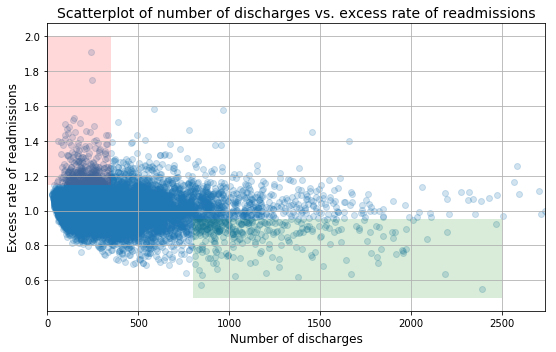

In [4]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

### A. Do you agree with the above analysis and recommendations? Why or why not?

I think it's misleading to say the readmission rate is trending down with increasing number of discharges based on the scatter plot above. While it appears that there are less high readmission rate points towards the right of the scatter plot, there are also less overall points. The majority of points are in the low number of discharges are on the left. If one were to fit a regression line to this data, it's not clear that it would in fact have a negative slope. It would be helpful to include a regression data if making such a claim.

A similar point can be made about the green and red regions. There are far more points overall on the left side of the plot for low number of discharges than on the right. Therefore the area shaded in green which is claimed to have greater incidence of lower rate of readmissions, can actually have less points below a readmission rate of 1, than the area on the left of the plot. It would help to actually quantify the differences between points above 1 and below 1 along the number of discharges.

The conclusions provide no numbers or actual data supporting the *significant correlation* between hospitcal capacity and readmission rates. There is also an assumption made that smaller hospitals are lacking resources to maintain lower readmissions. This should be supported by data.

The recommendations are again made based on the unsupported assumption that smaller hospitals lack the required resources to maintain lower readmissions.

### B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

I'll start by replotting the scatter plot with a regression line so we can interpret the relationship between 

In [124]:
import plotly
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from scipy import stats
import plotly.figure_factory as ff

init_notebook_mode(connected=True)

In [279]:
# take only rows that have a non-null excess readmission ratio
data = clean_hospital_read_df[clean_hospital_read_df['Excess Readmission Ratio'].notnull()]
data = data[['Number of Discharges', 'Excess Readmission Ratio']]

In [280]:
# plot data
xi = data['Number of Discharges']
yi = data['Excess Readmission Ratio']

trace0 = go.Scattergl(x=xi, y=yi, mode='markers', name='Data')

slope, intercept, r_value, p_value, std_err = stats.linregress(xi,yi)
line = slope*xi+intercept

trace1 = go.Scattergl(x=xi, y=line, mode='lines', name='Regression')

layout = go.Layout(title='Excess Readmission Ratio vs Discharges',
                  xaxis=dict(title='Number of Discharges'),
                  yaxis=dict(title='Excess Readmission Ratio'))

fig = go.Figure(data=[trace0, trace1], layout=layout)

iplot(fig, filename='readmission-vs-discharges.html')

In [308]:
slope = round(slope, 6)
intercept = round(intercept, 3)
print(f'Regression Equation: y={slope}*x + {intercept}', '| R-squared: %s' % round(r_value**2, 3))

Regression Equation: y=-2.9e-05*x + 1.018 | R-squared: 0.009


The regression line does show a negative slope which supports the claim that the excess readmission rate decreases with increasing number of discharges. However, the R-squared value of the fit is very low (0.009). Thus, one should use caution if using a linear model to describe this data, as the number of discharges is not a good predictor of the excess readmission ratio.

Now to get a sense of the difference in the number of points with an excess readmission rate above 1 versus below 1, we can bin the data and plot the difference in counts for each bin.

In [301]:
# define the bins as intervals of 500 discharges.
bins = np.arange(0,7001, 500)

# bin the data
data['bins'] = pd.cut(data['Number of Discharges'], bins=bins)

In [302]:
above = np.empty(len(bins))
below = np.empty(len(bins))

# count the number of points with a readmission ratio above 1
# and  below 1.
for i, j in enumerate(data.bins.unique()):

    sub = data[data.bins==j]
    
    above[i] = (sub['Excess Readmission Ratio'] > 1).sum()
    below[i] = (sub['Excess Readmission Ratio'] < 1).sum()

# summarize the counts in a df and calculate the absolute
# difference as well as percentage difference, relative
# to the total number of points.
diff_df = pd.DataFrame({'above': above.astype(int), 'below': below.astype(int)}).loc[:7,]
diff_df['diff'] = (diff_df.above - diff_df.below)
diff_df['perc_diff'] = (diff_df.above - diff_df.below)/len(data)
diff_df

above  below  diff  perc_diff
0   4668   4213   455   0.039576
1   1065   1077   -12  -0.001044
2    158    185   -27  -0.002348
3     32     56   -24  -0.002088
4     10     12    -2  -0.000174
5      5      2     3   0.000261
6      1      1     0   0.000000
7      0      1    -1  -0.000087

In [303]:
# convert the interval objects from the pd.cut() function into
# a list of strings to plot the data categorically.
plot_bins = [str(int(i.left)) + '-' + str(int(i.right)) for i in data.bins.unique()]

# create bar plot for absolute differences between points above
# and below a readmission ratio of 1.
bar = go.Bar(x=plot_bins, y=diff_df['diff'], name='Difference',
             marker=dict(color='rgb(50,205,50)'),
            yaxis='y1')

# create a line plot for % differences
line = go.Scatter(x=plot_bins, y=diff_df['perc_diff'], name='% Difference', yaxis='y2')

layout = go.Layout(title='Difference in Excess Readmission Ratios Above & Below 1',
                    legend=dict(orientation='h',x=0,y=1.1),
                   margin=dict(b=110),
                   yaxis=dict(title='Difference in Ratios above/below 1'),
                   yaxis2=dict(
                        title='% Difference From a Ratio of 1',
                        overlaying='y',
                        side='right',
                       tickformat=".2%"))

fig = go.Figure([bar, line], layout=layout)
iplot(fig, filename='bar.html')

From the plot above, we can see that number of excess readmission ratios > 1 is really only significantly greater than points with an excess readmission ratio < 1 between 0 to 500 discharges. Above 500, the difference is much less significant. This should be pointed out when considering the statements below:

"With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green)"

**Setup an appropriate hypothesis test.**

> In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1

> In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1

The claim is that there is a statistically significant difference in excess readmission rate between small capacity facilities (low number of discharges) and large capacity facilities (high number of discharges).

To test the statistical conclusions of the initial study, I will use a two-sample t test for the difference of means. However, I will use the number of discharges equal to 300 as the delineator for my two sample populations since this is what is recommended by the initial study:

> Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.

The null and alternate hypotheses are as follows:

H0: There is no difference in the mean excess readmission rate between large and small capacity hospitals. Or xbar_large - xbar_small = 0.

HA: There is a difference in the mean excess readmission rate between large and small capacity hospitals. Or xbar_large - xbar_small != 0.

In [328]:
# create the two subsampled datasets
small_capacity = data[data['Number of Discharges'] < 300]['Excess Readmission Ratio']
large_capacity = data[data['Number of Discharges'] >= 300]['Excess Readmission Ratio']

In [329]:
# plot the two distributions
fig = ff.create_distplot([small_capacity, large_capacity], 
                         group_labels=['Small Capacity (<300 Discharges)', 'Large Capacity (>=300 Discharges)'],
                         curve_type='normal', bin_size=0.01)

iplot(fig, filename='bootstrap_distribution.html')

The two distributions have a lot of overlap as expected. However, they clearly have different mean and standard deviations which is visible in the normal fits. Now we can calculate the test statistic for the difference in means of the two samples. We will report the result for a significance level of alpha = 0.01. The critical value for this significant level is t=2.581.

In [335]:
# calculate mean & std for small discharge sample
small_mean = small_capacity.mean()
small_std = small_capacity.std()

# calculate mean & std for large discharge sample
large_mean = large_capacity.mean()
large_std = large_capacity.std()

# calculate sample standard errors
large_se = (large_std**2)/len(large_capacity)
small_se = (small_std**2)/len(small_capacity)

DF = len(large_capacity)

t = (small_mean - large_mean)/np.sqrt(large_se + small_se)
print('t-score: %s' % round(t, 2))

t-score: 8.28


This is much larger than the critical value of 2.581. The corresponding p-value is <0.00001, thus we can reject the null hypothesis in support of the alternate hypothesis, that there is a statistically significant difference in the mean excess readmission rate between small and large capacity hospitals.

This supports the conclusion of the initial study, however some comments can be made about the practicality of the recommendations. First, at essentially all levels of the number of discharges per hospital, there are some hospitals that have an excess readmission rate above 1. Even if there are relatively more of these hospitals with number of discharges below 300, there are still hospitals with number of discharges above 300 that can be 40%+ higher than the average readmission rate. A more practical recommendation would be to focus on the outliers in the population with excess readmission rates above some goal, say 1.3. These outliers would make the biggest impact to the overall average readmission rate. Finally, there should be an additional study to support the assumption that hospitals with lower number of discharges have higher readmission rates because of a lack of resources before dumping resources into hospitals only to find no change in readmission rates.